TERM DEPOSIT PREDICTION FOR BANK

In [1]:
#Importing necessary libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing

import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading train data and test data
data= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
t_data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')

In [5]:
data.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [6]:
t_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [10]:
data.shape


(31647, 18)

In [11]:
t_data.shape

(13564, 17)

In [69]:
#Checking data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [54]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


We can see that a lot of columns are have object type data. We need to encode the data for further analysis

In [7]:
#Checking for null values
data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [8]:
t_data.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

None of the columns have null values

In [9]:
#let's drop columns that are not required, dropping ID.
data.drop(columns=['ID'],axis=1, inplace=True)

In [10]:
t_data.drop(columns=['ID'],axis=1, inplace=True)

In [11]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [8]:
#Let's check the unique types in columns and their counts
data.job.value_counts()


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [24]:
data.marital.value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [13]:
data.education.value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [15]:
data.default.value_counts()

no     31062
yes      585
Name: default, dtype: int64

In [16]:
data.contact.value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

In [17]:
data.poutcome.value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [18]:
data.month.value_counts()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

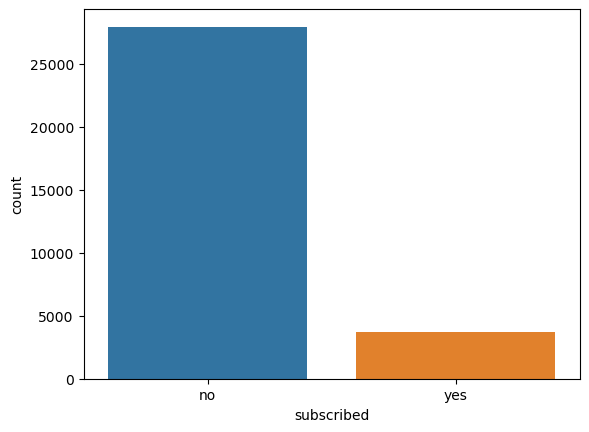

In [9]:
#Let's check the target distribution
sns.countplot(x='subscribed',data=data)

Clearly, the distribution seems to  be imbalanced. We will need to balance this for better outcome

In [11]:
#Let's also vizualize distribution of features with relation to the label
def plot_bar(column):
  
    temp_1 = pd.DataFrame()
    temp_1['No'] = data[data['subscribed'] == 'no'][column].value_counts()
    temp_1['Yes'] = data[data['subscribed'] == 'yes'][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show()


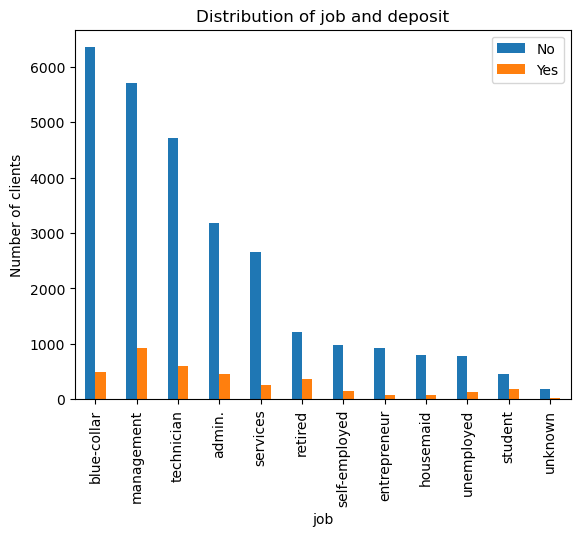

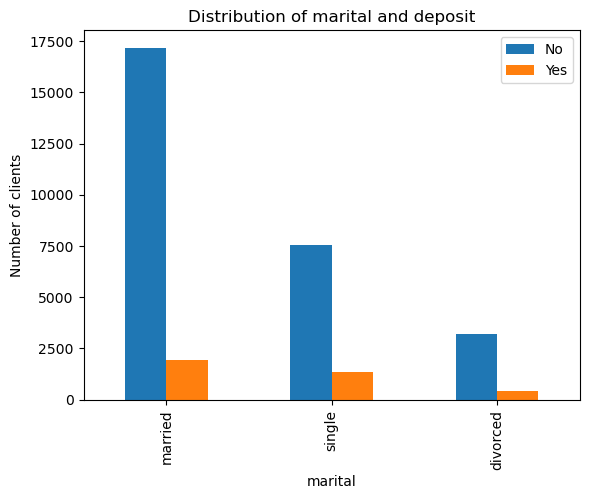

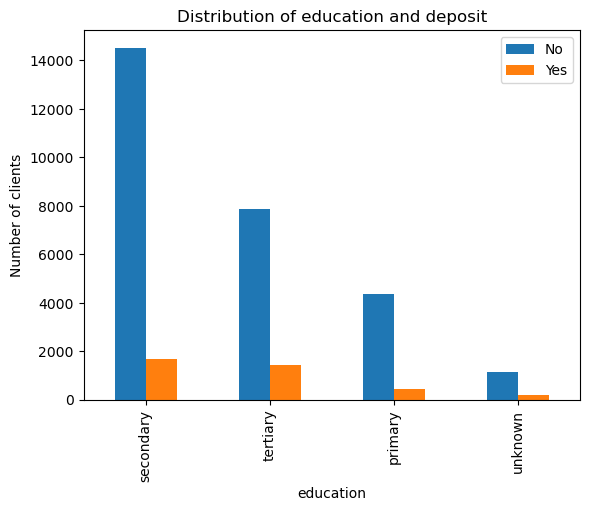

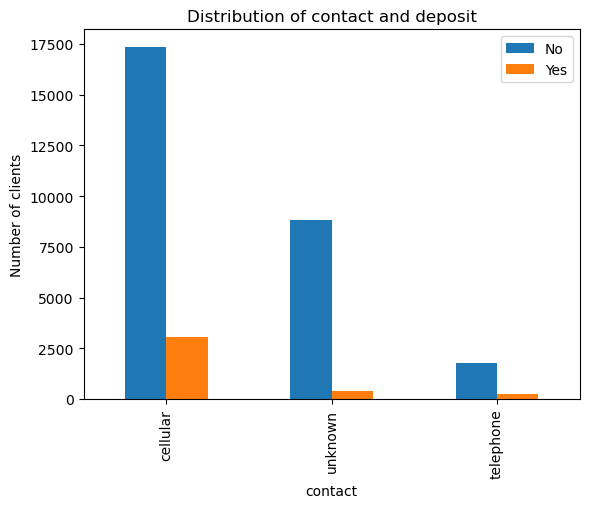

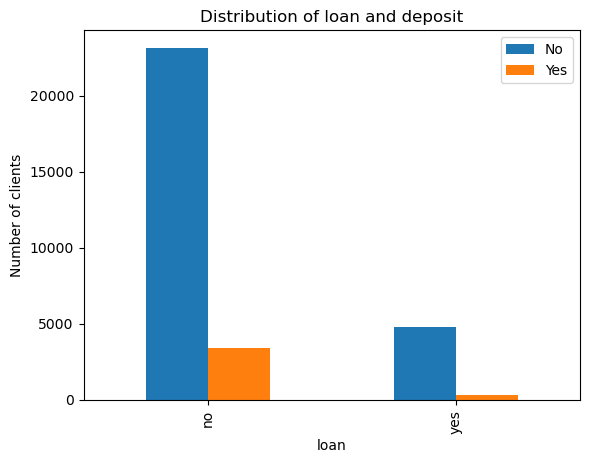

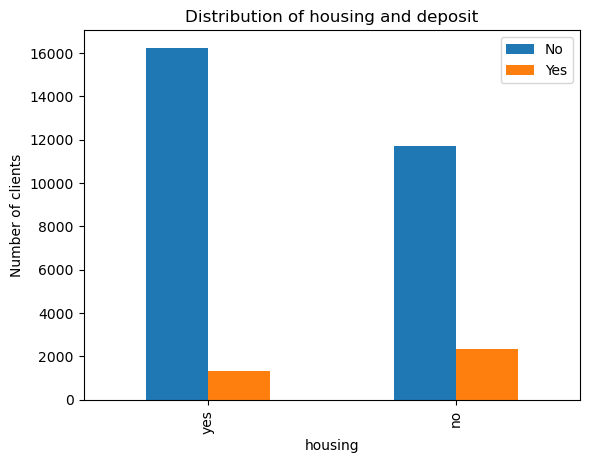

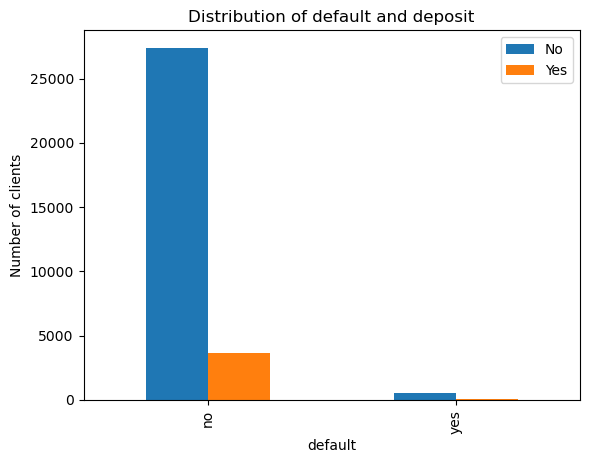

(None, None, None, None, None, None, None)

In [12]:
plot_bar('job'), plot_bar('marital'), plot_bar('education'), plot_bar('contact'), plot_bar('loan'), plot_bar('housing'),plot_bar('default')


Analysis-

1.Clients who are professionally into Blue-collar jobs, Management, technician, administration and retired clients are more likely to gor for term 
deposits while clients who are into services, self-employed,entrepreneur,unemployed or student are least likely to invest in term deposits.

2.Although in absolute terms married consumers more often agreed to the service, in relative terms the single was responded better.

3.Clients with secondary and tertiary are more likely to invest in term deposits.


4.Cellular contact seems to be the best contact mode to convince clients for term deposit.

5.Clients with loan and who are defaulters are very less likely to invest in term deposit.

6.Clients with housing are more interested in term deposits.

In [12]:
#Since most of the columns have object datatype, let's encode them to analyze them further.
from sklearn.preprocessing import LabelEncoder


In [13]:
le=LabelEncoder()

In [14]:
list = ['job','marital','education','default','housing','loan','contact','month','poutcome','subscribed']
for i in list:
    data[i]=le.fit_transform(data[i]).astype(str)


In [15]:
list = ['job','marital','education','default','housing','loan','contact','month','poutcome']
for i in list:
    t_data[i]=le.fit_transform(t_data[i]).astype(str)

In [16]:
t_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3


In [17]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [19]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        13564 non-null  int64 
 1   job        13564 non-null  object
 2   marital    13564 non-null  object
 3   education  13564 non-null  object
 4   default    13564 non-null  object
 5   balance    13564 non-null  int64 
 6   housing    13564 non-null  object
 7   loan       13564 non-null  object
 8   contact    13564 non-null  object
 9   day        13564 non-null  int64 
 10  month      13564 non-null  object
 11  duration   13564 non-null  int64 
 12  campaign   13564 non-null  int64 
 13  pdays      13564 non-null  int64 
 14  previous   13564 non-null  int64 
 15  poutcome   13564 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.7+ MB


In [20]:
#Even though the columns have been encoded, the data type still shows as object type. Let's convert it into integer data type
data['job']=data['job'].astype(int)
data['marital']=data['marital'].astype(int)
data['marital']=data['marital'].astype(int)
data['education']=data['education'].astype(int)
data['default']=data['default'].astype(int)
data['housing']=data['housing'].astype(int)
data['loan']=data['loan'].astype(int)
data['contact']=data['contact'].astype(int)
data['month']=data['month'].astype(int)
data['poutcome']=data['poutcome'].astype(int)
data['subscribed']=data['subscribed'].astype(int)


In [21]:
t_data['job']=t_data['job'].astype(int)
t_data['marital']=t_data['marital'].astype(int)
t_data['marital']=t_data['marital'].astype(int)
t_data['education']=t_data['education'].astype(int)
t_data['default']=t_data['default'].astype(int)
t_data['housing']=t_data['housing'].astype(int)
t_data['loan']=t_data['loan'].astype(int)
t_data['contact']=t_data['contact'].astype(int)
t_data['month']=t_data['month'].astype(int)
t_data['poutcome']=t_data['poutcome'].astype(int)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         31647 non-null  int64
 1   job         31647 non-null  int32
 2   marital     31647 non-null  int32
 3   education   31647 non-null  int32
 4   default     31647 non-null  int32
 5   balance     31647 non-null  int64
 6   housing     31647 non-null  int32
 7   loan        31647 non-null  int32
 8   contact     31647 non-null  int32
 9   day         31647 non-null  int64
 10  month       31647 non-null  int32
 11  duration    31647 non-null  int64
 12  campaign    31647 non-null  int64
 13  pdays       31647 non-null  int64
 14  previous    31647 non-null  int64
 15  poutcome    31647 non-null  int32
 16  subscribed  31647 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 2.9 MB


In [23]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        13564 non-null  int64
 1   job        13564 non-null  int32
 2   marital    13564 non-null  int32
 3   education  13564 non-null  int32
 4   default    13564 non-null  int32
 5   balance    13564 non-null  int64
 6   housing    13564 non-null  int32
 7   loan       13564 non-null  int32
 8   contact    13564 non-null  int32
 9   day        13564 non-null  int64
 10  month      13564 non-null  int32
 11  duration   13564 non-null  int64
 12  campaign   13564 non-null  int64
 13  pdays      13564 non-null  int64
 14  previous   13564 non-null  int64
 15  poutcome   13564 non-null  int32
dtypes: int32(9), int64(7)
memory usage: 1.2 MB


Now the data seems fine. All columns have integer data type with no null values

In [24]:
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


Observation-

1. Standard deviation of columns range from 0.134(default) to 3028(balance) which indicates that the 
variability in data is high.

2.The difference between 75% and max of balance column is huge and so is for duration column.

3.The distribution of a lot of columns seem skewed


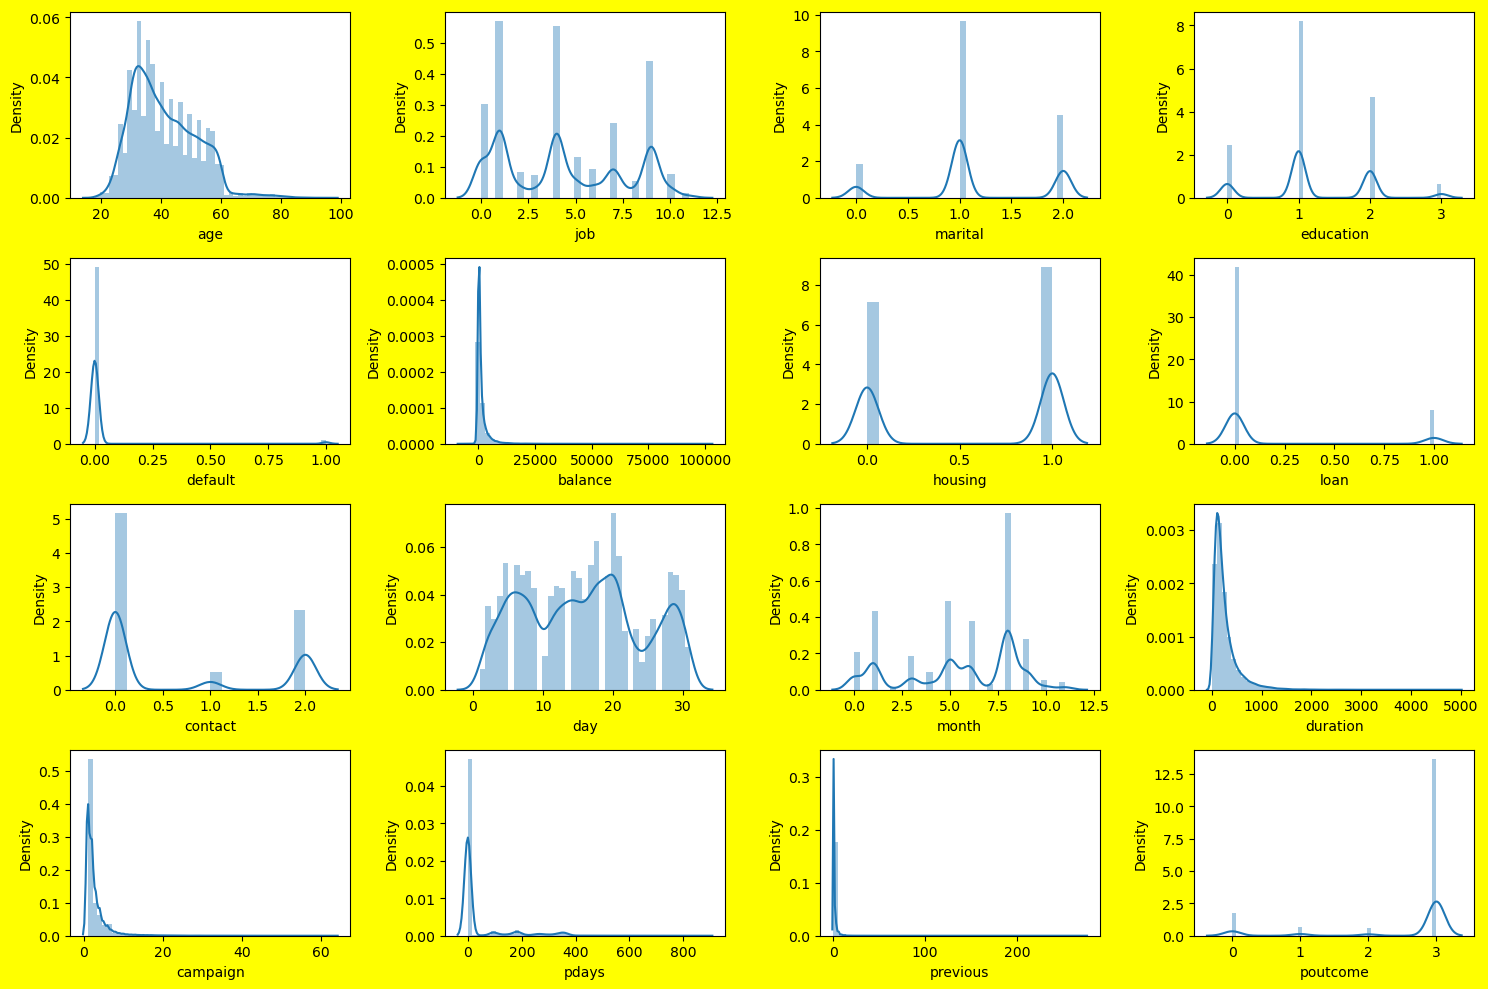

In [22]:
#Let's vizualize the distribution of data for each feature
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

The distribution of most of the columns is left skewed. All the columns have skewness and there is a need to check outliers.

plt.figure(figsize=(6,38),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(16,1,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Age, loan and default columns have outliers on the higher side and balance has a high number of outliers both is higher and lower side. However, taking into consideration how much bank balance can vary for clients in a Bank and there can be age difference in the clients and loan amounts can also vary, they is valid.

In [25]:
#Let's check the skewness of data
data.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

In [26]:
t_data.skew()

age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      9.165015
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     3.017221
campaign     4.958236
pdays        2.555601
previous     8.704583
poutcome    -1.921847
dtype: float64

It is evident that the skewness is present in a lot of features and for previous, it is 49.3 which is way higher than what it ideally should be.

In [27]:
#Let's remove skewness using PowerTrandsformer
from sklearn.preprocessing import PowerTransformer

In [28]:
scaler=PowerTransformer(method='yeo-johnson')

In [29]:
features=['default','balance','loan','duration','campaign','previous']

In [30]:
data[features]=scaler.fit_transform(data[features].values)

In [31]:
data.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       0.821075
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.017331
campaign      0.230683
pdays         2.642374
previous      1.661485
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [32]:
t_data[features]=scaler.fit_transform(t_data[features].values)

In [33]:
t_data.skew()

age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      2.258038
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     0.019436
campaign     0.231562
pdays        2.555601
previous     1.610955
poutcome    -1.921847
dtype: float64

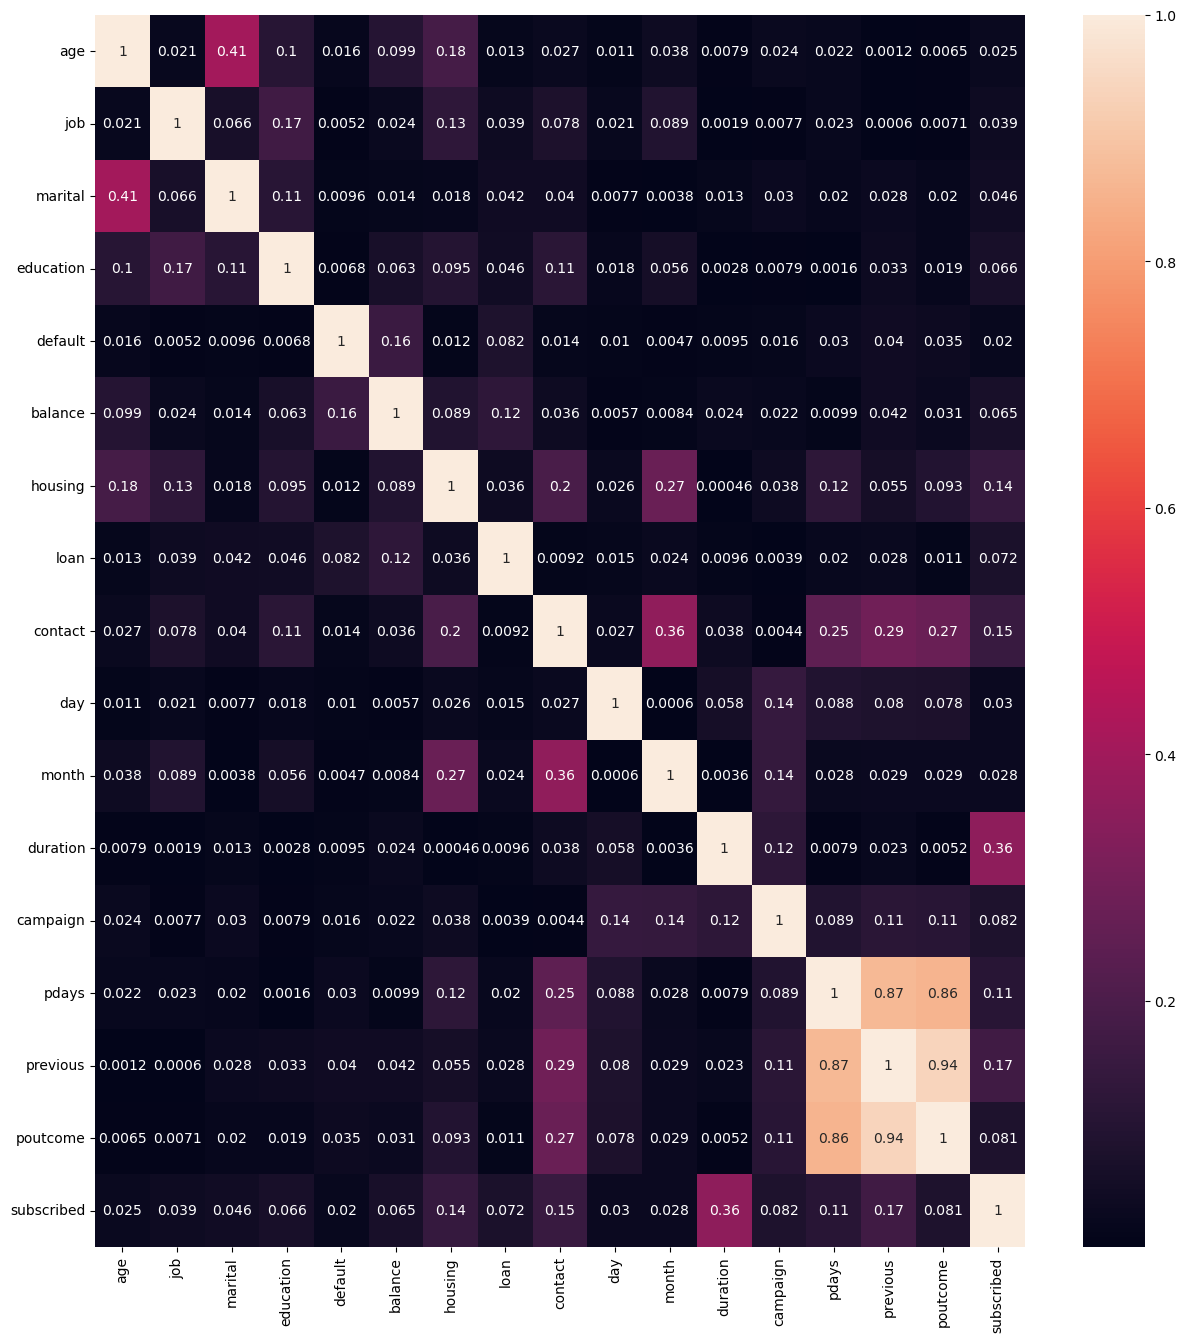

In [34]:
#Skewness has been fixed now. Let's check correlation between features using heatmap
df_corr= data.corr().abs()
plt.figure(figsize=(15,16))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})
plt.show()


The features previous and poutcome seem to be highly correlated. Also, correlation between previous and pdays is high


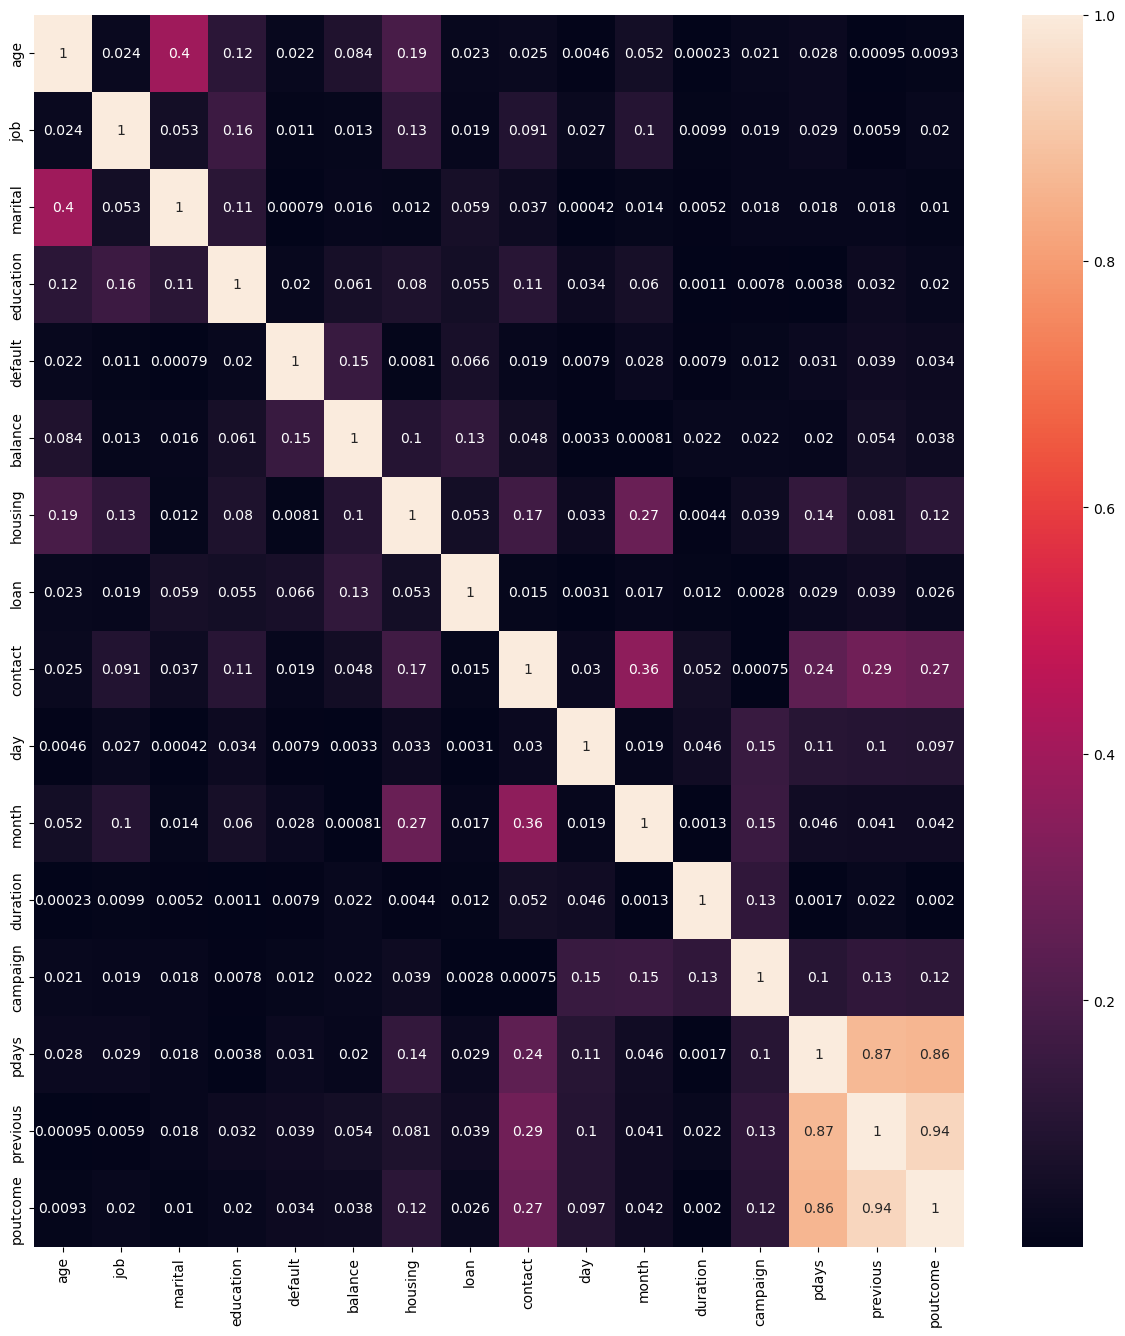

In [35]:
df_corr= t_data.corr().abs()
plt.figure(figsize=(15,16))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})
plt.show()

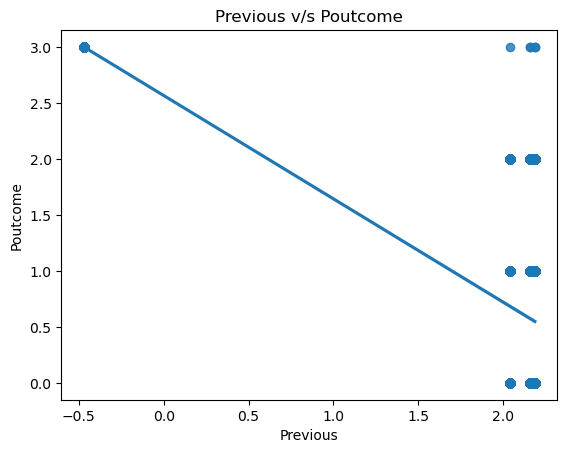

In [102]:
#Let's confirm our initial observation
sns.regplot(x='previous',y='poutcome',data=data)
plt.xlabel('Previous')
plt.ylabel('Poutcome')
plt.title('Previous v/s Poutcome')
plt.show()

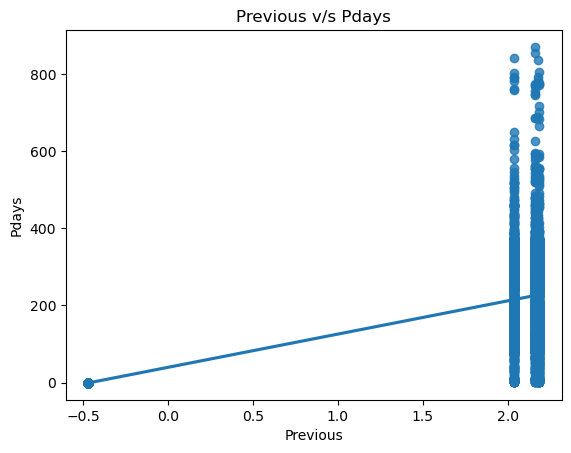

In [103]:
sns.regplot(x='previous',y='pdays',data=data)
plt.xlabel('Previous')
plt.ylabel('Pdays')
plt.title('Previous v/s Pdays')
plt.show()

It's evident that the correlation is there among the features but they are negatively correlated

<Axes: title={'center': 'Correlation with subscribed'}>

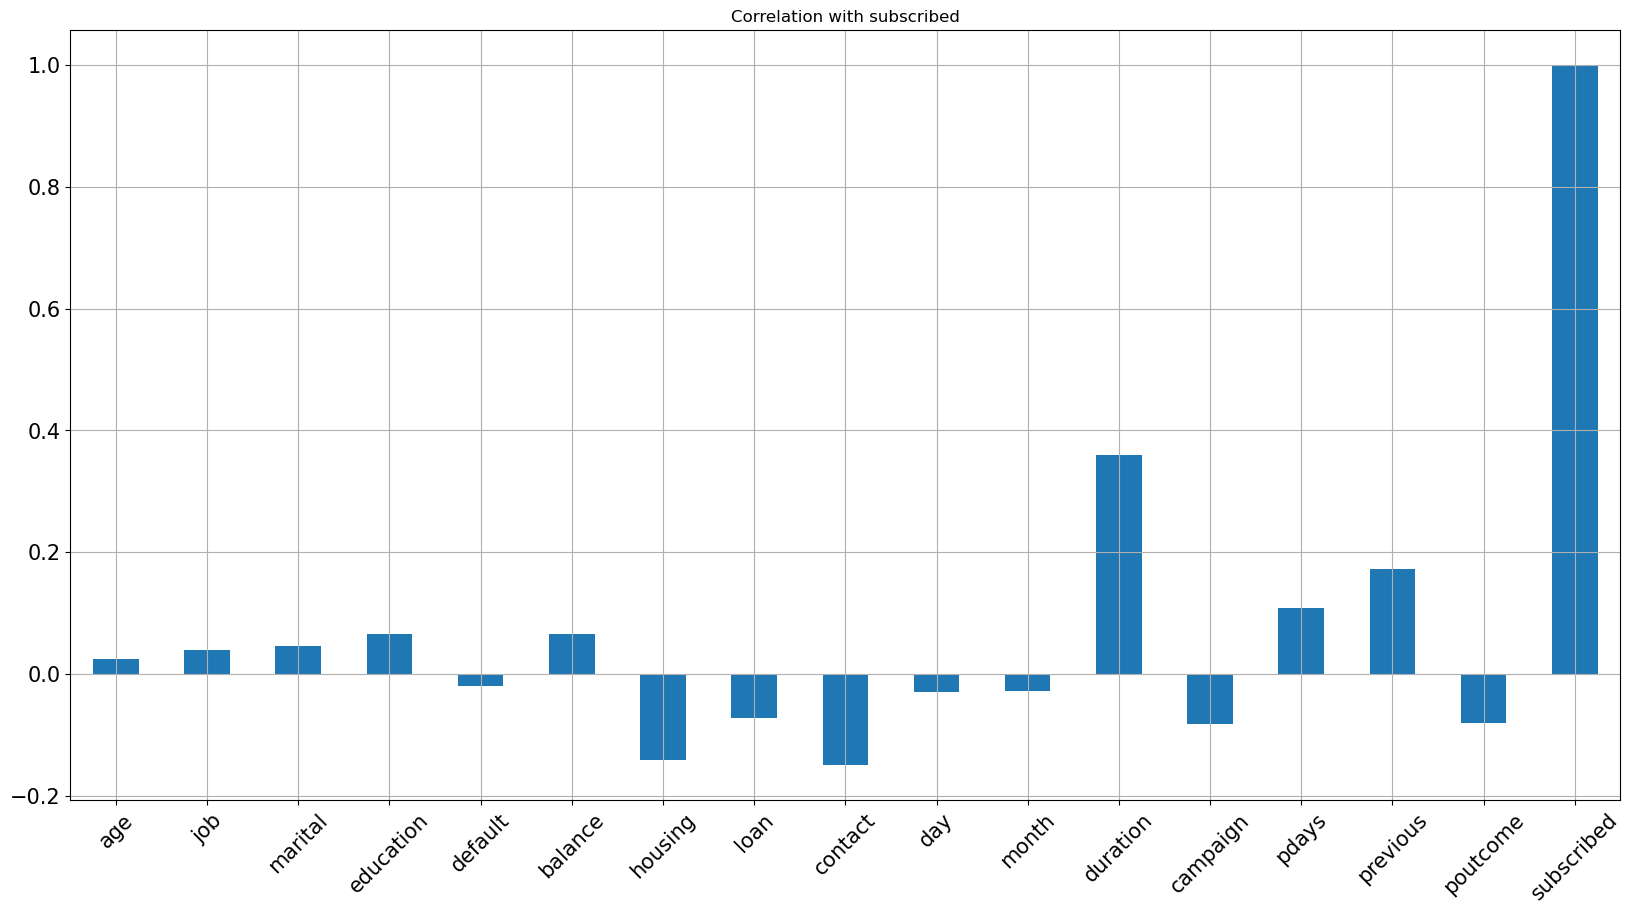

In [104]:
#Correlation with subscribed(label) with respect to attributes
data.corrwith(data.subscribed).plot.bar(
        figsize = (20, 10), title = "Correlation with subscribed", fontsize = 15,
        rot = 45, grid = True)

The features like age, default, day and month have low correlation with the label. It's also evident that contact, housing and
duration if call highly impact the label. Since default has very less impact on label, let's eliminate it.

In [36]:
#Splitting features and label
X=data.drop(columns=['subscribed','default'],axis=1)
y=data['subscribed']

In [37]:
x=t_data.drop(columns=['default'],axis=1)

In [38]:
X

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,0,1,3,0.340062,0,-0.439893,1,19,9,-1.443825,0.135025,-1,-0.469673,3
1,31,11,1,1,-0.432502,0,-0.439893,0,20,5,-0.751296,0.135025,-1,-0.469673,3
2,27,7,1,1,-0.031475,1,-0.439893,0,18,5,0.290005,-1.109239,-1,-0.469673,3
3,57,4,0,2,0.776856,0,-0.439893,0,22,6,1.895948,-1.109239,84,2.177812,2
4,31,9,1,1,-0.361739,1,-0.439893,0,4,3,0.833299,-1.109239,-1,-0.469673,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,-0.435463,1,-0.439893,0,12,8,-0.503544,0.135025,-1,-0.469673,3
31643,53,4,0,2,-0.238544,0,2.273280,0,5,6,1.008101,0.135025,-1,-0.469673,3
31644,32,4,2,2,-0.268747,0,-0.439893,0,7,1,-1.598288,0.738582,-1,-0.469673,3
31645,57,9,1,1,-0.308996,1,-0.439893,1,15,8,-2.037314,1.609201,337,2.186083,0


In [39]:
x

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,-0.349877,1,-0.429564,0,15,8,-2.060474,1.484674,-1,-0.479073,3
1,78,5,0,0,0.636076,0,-0.429564,1,1,5,0.802165,-1.105760,-1,-0.479073,3
2,31,6,2,2,-0.335968,1,-0.429564,2,16,8,1.555360,-1.105760,-1,-0.479073,3
3,57,7,2,0,0.940270,1,-0.429564,1,13,8,-1.058210,0.133392,-1,-0.479073,3
4,45,1,0,1,-2.747632,0,2.327941,2,3,5,-0.537642,-1.105760,-1,-0.479073,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,-0.392516,0,-0.429564,0,28,1,-0.240061,1.089247,-1,-0.479073,3
13560,54,1,1,0,0.473571,1,-0.429564,2,20,6,-0.170648,-1.105760,-1,-0.479073,3
13561,35,5,1,0,-0.266423,1,-0.429564,0,29,4,-0.328846,-1.105760,-1,-0.479073,3
13562,29,0,2,1,-0.186352,0,-0.429564,0,9,9,0.128628,0.133392,91,2.141219,2


In [40]:
#Standardizing data
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [42]:
X_scaled

array([[ 1.41579295, -1.324317  , -0.27540549, ..., -0.40855484,
        -0.46967334,  0.44177692],
       [-0.93715562,  2.03772948, -0.27540549, ..., -0.40855484,
        -0.46967334,  0.44177692],
       [-1.31362739,  0.81516712, -0.27540549, ..., -0.40855484,
        -0.46967334,  0.44177692],
       ...,
       [-0.84303767, -0.10175464,  1.37156305, ..., -0.40855484,
        -0.46967334,  0.44177692],
       [ 1.5099109 ,  1.4264483 , -0.27540549, ...,  2.99472279,
         2.18608335, -2.61304774],
       [ 1.32167501, -0.10175464, -1.92237403, ..., -0.40855484,
        -0.46967334,  0.44177692]])

In [43]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [44]:
x_scaled

array([[-0.83811435,  0.80755146, -0.2765922 , ..., -0.41819927,
        -0.47907256,  0.45216308],
       [ 3.49998693,  0.19676004, -1.91417256, ..., -0.41819927,
        -0.47907256,  0.45216308],
       [-0.9324209 ,  0.50215575,  1.36098816, ..., -0.41819927,
        -0.47907256,  0.45216308],
       ...,
       [-0.5551947 ,  0.19676004, -0.2765922 , ..., -0.41819927,
        -0.47907256,  0.45216308],
       [-1.121034  , -1.33021853,  1.36098816, ...,  0.48392585,
         2.14121949, -0.54283043],
       [-1.121034  , -1.33021853, -0.2765922 , ...,  3.14127268,
         1.98442826, -2.53281745]])

In [45]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y, random_state=15, test_size=0.30,)

In [47]:
y_train

10415    1
29981    0
6435     0
29185    1
745      0
        ..
16247    0
2693     0
8076     0
20213    0
7624     0
Name: subscribed, Length: 22152, dtype: int32

Earlier we had also seen that high numbers of users not optiong for term deposit is way higher that clients opting for it
which means that the dataset is imbalanced.


In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
over_smp=SMOTE(random_state=15,k_neighbors=3,sampling_strategy=0.70)

In [50]:
X_train_ns,y_train_ns=over_smp.fit_resample(X_train,y_train)

In [51]:
y_train.value_counts()

0    19564
1     2588
Name: subscribed, dtype: int64

In [52]:
y_train_ns.value_counts()

0    19564
1    13694
Name: subscribed, dtype: int64

The data seems balanced now

In [53]:
#Model instantiating and training
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [54]:
lr = LogisticRegression()
lr.fit(X_train_ns, y_train_ns)

LogisticRegression()

In [55]:
# Predicting Test Set
y_pred1 = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred1)
prec = precision_score(y_test, y_pred1)
rec = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

In [56]:
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model_', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)


                Model_  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.847183    0.42204  0.778172   0.54727


In [57]:
#Using SVC
from sklearn.svm import SVC

In [58]:
svc = SVC()
svc.fit(X_train_ns,y_train_ns)

SVC()

In [59]:
# Predicting Test Set
y_pred2 = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred2)
prec = precision_score(y_test, y_pred2)
rec = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)


In [60]:
model_results = pd.DataFrame([['SVC', acc, prec, rec, f1]],
               columns = ['Model_', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                Model_  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.847183   0.422040  0.778172  0.547270
1                  SVC  0.849816   0.428503  0.795031  0.556868


In [61]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier()
knn.fit(X_train_ns,y_train_ns)

KNeighborsClassifier()

In [63]:
# Predicting Test Set
y_pred3 = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred3)
prec = precision_score(y_test, y_pred3)
rec = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)

In [64]:
model_results = pd.DataFrame([['KNN', acc, prec, rec, f1]],
               columns = ['Model_', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                Model_  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.847183   0.422040  0.778172  0.547270
1                  SVC  0.849816   0.428503  0.795031  0.556868
2                  KNN  0.832754   0.380632  0.652174  0.480706


In [65]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt = DecisionTreeClassifier()
dt.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier()

In [67]:
# Predicting Test Set
y_pred4 = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)

In [68]:
model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model_', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                Model_  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.847183   0.422040  0.778172  0.547270
1                  SVC  0.849816   0.428503  0.795031  0.556868
2                  KNN  0.832754   0.380632  0.652174  0.480706
3        Decision Tree  0.869826   0.460593  0.565217  0.507570


In [69]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf = RandomForestClassifier()
rf.fit(X_train_ns,y_train_ns)


RandomForestClassifier()

In [71]:
# Predicting Test Set
y_pred5 = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred5)
prec = precision_score(y_test, y_pred5)
rec = recall_score(y_test, y_pred5)
f1 = f1_score(y_test, y_pred5)

In [72]:
model_results = pd.DataFrame([['Random Forest Classifier', acc, prec, rec, f1]],
               columns = ['Model_', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                     Model_  Accuracy  Precision    Recall  F1 Score
0       Logistic Regression  0.847183   0.422040  0.778172  0.547270
1                       SVC  0.849816   0.428503  0.795031  0.556868
2                       KNN  0.832754   0.380632  0.652174  0.480706
3             Decision Tree  0.869826   0.460593  0.565217  0.507570
4  Random Forest Classifier  0.902686   0.586090  0.613132  0.599306


In [73]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_ns,y_train_ns)

GradientBoostingClassifier()

In [75]:
# Predicting Test Set
y_pred6 = gbc.predict(X_test)
acc = accuracy_score(y_test, y_pred6)
prec = precision_score(y_test, y_pred6)
rec = recall_score(y_test, y_pred6)
f1 = f1_score(y_test, y_pred6)

In [76]:
model_results = pd.DataFrame([['Gradient Boosting Classifier', acc, prec, rec, f1]],
               columns = ['Model_', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                         Model_  Accuracy  Precision    Recall  F1 Score
0           Logistic Regression  0.847183   0.422040  0.778172  0.547270
1                           SVC  0.849816   0.428503  0.795031  0.556868
2                           KNN  0.832754   0.380632  0.652174  0.480706
3                 Decision Tree  0.869826   0.460593  0.565217  0.507570
4      Random Forest Classifier  0.902686   0.586090  0.613132  0.599306
5  Gradient Boosting Classifier  0.888678   0.521578  0.750665  0.615497


In [77]:
final_score = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
             'ACC':[accuracy_score(y_test,y_pred1)*100,
                   accuracy_score(y_test,y_pred2)*100,
                   accuracy_score(y_test,y_pred3)*100,
                   accuracy_score(y_test,y_pred4)*100,
                   accuracy_score(y_test,y_pred5)*100,
                   accuracy_score(y_test,y_pred6)*100]})

In [78]:
final_score

,Models,ACC
0,LR,84.718273
1,SVC,84.981569
2,KNN,83.275408
3,DT,86.982622
4,RF,90.268562
5,GBC,88.867825


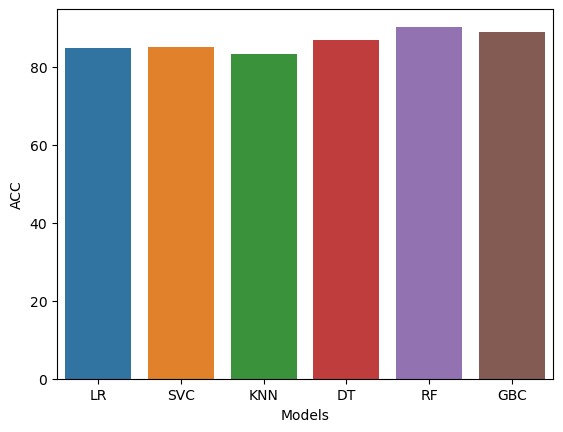

In [79]:
sns.barplot(x='Models', y='ACC', data=final_score)
plt.show()

Clearly, Random Forest and Gradient Boosting models are giving the highest score, 
We will choose Random Forest Classifier as it gives the highest accuracy of 90%

In [85]:
#Hyper parameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [91]:
parameter={'criterion':['gini','entropy'],
          'random_state':[10,30],
          'max_depth':[10,30],
          'n_jobs':[-1, 2],
          'n_estimators':[50,80]}

In [92]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [93]:
GCV.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 30], 'n_estimators': [50, 80],
                         'n_jobs': [-1, 2], 'random_state': [10, 30]})

In [94]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'n_estimators': 80,
 'n_jobs': -1,
 'random_state': 30}

In [95]:
Final_model=RandomForestClassifier(criterion='entropy',max_depth=30,n_estimators=80,n_jobs= -1,random_state= 30)

In [96]:
Final_model.fit(X_train_ns,y_train_ns)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=80,
                       n_jobs=-1, random_state=30)

In [98]:
pred=Final_model.predict(X_test)

In [99]:
acc=accuracy_score(y_test,pred)
print(acc*100)

89.942074776198


In [100]:
#saving and loading data
import joblib

In [101]:
joblib.dump(Final_model,"term deposit prediction")

['term deposit prediction']

In [102]:
model = joblib.load("term deposit prediction")

In [105]:
x

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,-0.349877,1,-0.429564,0,15,8,-2.060474,1.484674,-1,-0.479073,3
1,78,5,0,0,0.636076,0,-0.429564,1,1,5,0.802165,-1.105760,-1,-0.479073,3
2,31,6,2,2,-0.335968,1,-0.429564,2,16,8,1.555360,-1.105760,-1,-0.479073,3
3,57,7,2,0,0.940270,1,-0.429564,1,13,8,-1.058210,0.133392,-1,-0.479073,3
4,45,1,0,1,-2.747632,0,2.327941,2,3,5,-0.537642,-1.105760,-1,-0.479073,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,-0.392516,0,-0.429564,0,28,1,-0.240061,1.089247,-1,-0.479073,3
13560,54,1,1,0,0.473571,1,-0.429564,2,20,6,-0.170648,-1.105760,-1,-0.479073,3
13561,35,5,1,0,-0.266423,1,-0.429564,0,29,4,-0.328846,-1.105760,-1,-0.479073,3
13562,29,0,2,1,-0.186352,0,-0.429564,0,9,9,0.128628,0.133392,91,2.141219,2


In [121]:
new_pred = rf.predict(x_scaled)
if new_pred[1]==0:
    print("No term Deposit: ",new_pred[1])
if new_pred[1]==1:
    print("Yes term Deposit: ",new_pred[1])

    

Yes term Deposit:  1


In [122]:
new_pred = rf.predict(x_scaled)
if new_pred[0]==0:
    print("No term Deposit: ",new_pred[0])
if new_pred[0]==1:
    print("Yes term Deposit: ",new_pred[0])


No term Deposit:  0


In [126]:
new_pred = rf.predict(x_scaled)
if new_pred[2]==0:
    print("No term Deposit: ",new_pred[2])
if new_pred[2]==1:
    print("Yes term Deposit: ",new_pred[2])

Yes term Deposit:  1


In [125]:
new_pred = rf.predict(x_scaled)
print("Term deposit prediction : ",new_pred)

Term deposit prediction :  [0 1 1 ... 0 1 0]
